# Regularized Classification on Titanic Dataset

We are going to use a dataset from a Kaggle competition (https://www.kaggle.com/c/titanic/data)
 
### Dataset description

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were more likely to survive. 

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).



# TO DO: put your ID number ("numero di matricola")
It will be used as seed for splitting the data into training and test. You can also try different seeds to see the impact of the random subdvision of the train and test sets and of the random components in the algorithm on the results.

In [1]:
import numpy as np

#put here your ``numero di matricola''
IDnumber = 1184444 # substitute with your ID 
np.random.seed(IDnumber)

In [2]:
# let's load library for plotting
%matplotlib inline  
import matplotlib.pyplot as plt

## Data Preprocessing

Load the data from a .csv file. In this notebook we use the pandas (Python Data Analysis Library) package, since it provides useful functions to clean the data. In particular, it allows us to remove samples with missing data, as we do below. We also plot some descriptions of columns, check the pandas documentation for 'describe()' if you want to know more.

In [3]:
# let's load pands and numpy
import pandas as pd
import numpy as np

# this time we use pandas to load and clean the dataset

# read the data from the csv file
df = pd.read_csv("data/titanicData.csv")

# remove columns 'Ticket', 'Cabin', and 'Name' from the data since they are not relevant
df = df.drop(['Ticket','Cabin','Name'], axis=1)
# remove samples with missing values
df = df.dropna() 
# let's see some statistics about the data 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Now we create data matrices: many of the features (columns of indices 0,1,3,4,6 in Xcat below) are categorical, so we need to encode them with ***indicator matrices***. That is, if a feature can take $\ell$ different values $v_1,\dots,v_{\ell}$, we create $\ell$ indicator (0-1) features $I_1,\dots,I_{\ell}$, such that $I_{j} = 1$ if and only if the value of the feature is $v_j$. This can be done in Python by first encode a feature with integers with LabelEncoder() and then obtain the indicator variables with OneHotEncoder().

In [4]:
#df.values contains the data, both the values of instances and the value of the label
Data = df.values
# the matrix including the categorical data is given by columns from the second one 
X_categorical = Data[:,2:]
# the target value (class) is in the first column
Y = Data[:,1]

print(list(df))

# get the number d of features of each sample
d = X_categorical.shape[1]

# get the number m of samples
m = X_categorical.shape[0]

#let's see what the number of samples is
print("Number of samples: {}".format(m))

#now encode categorical variables using integers and one-hot-encoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

# encode the first column of the data matrix into indicator variables

X_tmp = label_encoder.fit_transform(X_categorical[:,0])
X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
X = onehot_encoder.fit_transform(X_tmp[:,0].reshape(-1,1)).toarray()

# repeat for the other categorical input variables, which have indices 1, 3, 4, and 6 in the X_categorical
index_categorical = [1,3,4,6]

for i in range(1,7):
    if i in index_categorical:
        X_tmp = label_encoder.fit_transform(X_categorical[:,i])
        X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
        X_tmp = onehot_encoder.fit_transform(X_tmp[:,0].reshape(-1,1)).toarray()
        X = np.hstack((X,X_tmp))
    else:
        X_tmp = X_categorical[:,i]
        X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
        X = np.hstack((X,X_tmp))

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Number of samples: 712


## Data Preprocessing

The class labels are already 0-1, so we can use them directly.

In [5]:
# properly encode the target labels
Y = label_encoder.fit_transform(Y)
K = max(Y) + 1 # number of classes

print("Number of classes: "+str(K))

Number of classes: 2


Given $m$ total data points, keep $m\_training = 70$ data points as data for ***training and validation*** and $m\_test = m - m\_training$ as test data. Splitting is random, using as seed your ID number. Make sure that the training set contains at least 10 instances from each class.If it does not, modify the code so to apply a random
permutation (or the same permutation multiple times) to the samples until this happens.

In [6]:
# Split data into training and validation data

# load a package which is useful for the training-test splitting
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# number of samples
m = np.shape(X)[0]

#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.

permutation = np.random.permutation(m)
X = X[permutation]
Y = Y[permutation]

#################################################################
#TO DO THE LASTS 2 QUESTIONS I'VE COPIED AND PASTED FROM THIS POINT(AS SUGGESTED)
#AND CHANGED THE VARIABLE BELOW FROM 70 TO 500
m_training = 70  # use 70 samples for training + validation... THEN 500
################################################################


m_test = m-m_training # and the rest for testing

# test_size is the proportion of samples in the test set
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size =float(m_test)/float(m), random_state = IDnumber)

print(Y_training)

m_training = X_training.shape[0]
m_test = X_test.shape[0]

#let's see what the fraction of ones in the entire dataset is
print(float(sum(Y_training)+sum(Y_test))/float(m_training+m_test))

[0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0]
0.4044943820224719


Standardize the data to have zero-mean and unit variance (columnwise):

In [7]:
# Standardize the Features Matrix
from sklearn import preprocessing

X = X.astype(np.float64) #standard scaler works with double precision data
X_training = X_training.astype(np.float64)
X_test = X_test.astype(np.float64)

#let's use the standard scaling; we degine the scaling for the entire dataset
scaler = preprocessing.StandardScaler().fit(X)

#let's apply the scaling to the training set

X_training = scaler.transform(X_training)
#let's apply the scaling to the test set

X_test = scaler.transform(X_test)

### Perform Logistic Regression

We now perform logistic regression using the function provided by Scikit-learn.

Note: as provided by Scikit-learn, logistic regression is always implemented using regularization. However, the impact of regularization can be dampened to have almost no regularization by changing the parameter $C$, which is the inverse of $\lambda$. Therefore to have no regularization, which is $\lambda = 0$ for the model seen in class, we need $C$ to have a large value. Here we fix $C = 100000000$.

[Note that the intercept is estimated in the model.]

For all our models we are going to use 10-fold cross validation to estimate the parameters (when needed) and/or estimate the validation error.

In [8]:
from sklearn import linear_model

# define a logistic regression model with very high C parameter -> low impact from regularization;
# there are many solvers available to obtain the solution to the logistic regression problem, we just pick
# one of them; 'cv' is the number of folds in cross-validation; we also specify l2 as regularization penalty,
# just to pick one; Cs contains the values of C to be tested and to pick from with validation. Here we
# are interested in only 1 value of C, and use cross-validation just to estimate the validation error
# in a same way as other models

reg = linear_model.LogisticRegressionCV(Cs=[100000000], solver='newton-cg',cv=10, penalty='l2')

#fit the model on training data
reg.fit(X_training, Y_training)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( reg.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds

CV_accuracies = np.divide(np.sum(reg.scores_[1],axis=0),10)

# let's print the average accuracies obtained for the various values of C

print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it

print("Best value of parameter C according to 10-fold Cross-Validation: {}".format( reg.C_[0] ))

# let's store the best CV accuracy, and then print it
reg_best_CV_accuracy = max(CV_accuracies)
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( reg_best_CV_accuracy ))

Values of parameter C tried in 10-fold Cross-Validation: [100000000]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.80535714]
Best value of parameter C according to 10-fold Cross-Validation: 100000000
10-fold Cross-Validation accuracies obtained with the best value of parameter C: 0.8053571428571429


Note that the logistic regression function in Scikit-learn has many optional parameters. Read the documentation if you want to understand what they do!

## TODO 1
### Learn the best model from Logistic Regression on the entire training set and examine coefficients (by printing and plotting them)

Note that you can use simply $linear\_model.LogisticRegression()$, that does not use cross-validation, without passing the best value of $C$ (and then fit()).

Coefficients obtained using the entire training set: [[ 1.18174617 -0.14475822 -0.91050108  0.84629277 -0.84629277 -0.89315201
   0.52390615 -0.21734324 -0.08469654 -1.35539041  0.18262666  0.09536367
  -0.13913577 -0.0234173   0.15794089  0.09536367  0.0852356   0.09536367
   0.04252779 -0.46339637  0.11424915 -0.00179026 -0.10538171]]
Intercept: [-1.13400653]


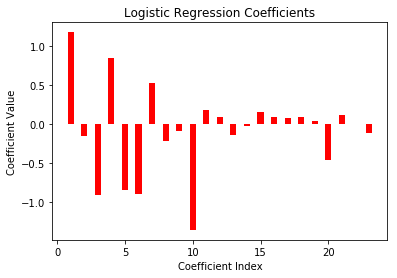

In [9]:
# let's define the Logistic Regression model
#same as before
reg_full = linear_model.LogisticRegression(C=100000000, solver='newton-cg', penalty='l2')

# get the best model using the entire training dataset
reg_full.fit(X_training, Y_training)

# print the coefficients from the logistic regression model.
print("Coefficients obtained using the entire training set: {}".format( reg_full.coef_ ))

# note that the intercept is not in coef_, it is in intercept_

print("Intercept: {}".format( reg_full.intercept_ ))

# Plot the coefficients
reg_coef = reg_full.coef_.reshape(reg_full.coef_.shape[1],)
plt.figure()
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
plt.bar(ind, reg_coef, width, color='r')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

## TODO 2

### Questions: How many coefficients do you get? Why? How many of them are "close" to 0? (max 5 lines)

There are $23$ coefficients since each of them corresponds to a weighted feature (2 sex, three classes, ecc.). The definition of close it's trivial, anyway there are few of them which are un the order of $10^{-2}$ and one even at a lower degree which seems not visible in the graphical representation.

## TODO 3
### Predict labels on training and test

- Compute the predicted labels on training and test data using reg.predict
 - Evaluate the accuracy using metrics.accuracy_score from scikit-learn (it returns the percentage of data correctly classified).
 - Evaluate the score used by logistic regression on training and test data using metrics.accuracy_score()

In [10]:
from sklearn import metrics

# prediction on training data
Y_training_prediction_LR = reg_full.predict(X_training)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
print("Training Accuracy:", 100 * metrics.accuracy_score(Y_training, Y_training_prediction_LR),'%')

# prediction on test data
Y_test_prediction_LR = reg_full.predict(X_test)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
print("Test Accuracy:", 100 * metrics.accuracy_score(Y_test, Y_test_prediction_LR),'%')

Training Accuracy: 91.42857142857143 %
Test Accuracy: 77.57009345794393 %


## TODO 4
### Use L2 regularized logistic regression with cross-validation

We perform the L2 regularization for different values of the regularization parameter $C$, and use the Scikit-learn function to perform cross-validation (CV).

In L2 regularized logistic regression, the following L2 regularization term is added to the loss:

$$
    \lambda \sum_{i=1}^d w_i^2
$$

The parameter $C$ used by Scikit learn corresponds to the inverse of $\lambda$, that is $C = \frac{1}{\lambda}$.

Note: the CV in Scikit-learn is by default a *stratified* CV, that means that data is split into train-validation while maintaining the proportion of different classes in each fold.

In the code below:
- use LogisticRegressionCV() to select the best value of C with a 10-fold CV with L2 penalty;
- use LogisticRegression() to learn the best model for the best C with L2 penalty on the entire training set

Note that LogisticRegressionCV() picks some default values of C to try, but you may need to pass some other values in case for your dataset you need to explore a different interval of values. This applies every time that you use LogisticRegressionCV().

In [11]:
#define the model using LogisticRegressionCV passing an appropriate solver, cv value, and choice of penalty
regL2 = linear_model.LogisticRegressionCV(solver = "newton-cg", cv = 10, penalty = "l2")

#fit the model on training data
regL2.fit(X_training, Y_training)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( regL2.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds
CV_accuracies = np.divide(np.sum(regL2.scores_[1],axis=0),10)

# let's print the average accuracies obtained for the various values of C
print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it
print ("Best value of parameter C: {}".format( regL2.C_[0] ))

# let's store the best CV accuracy, and then print it
regL2_best_CV_accuracy = max(CV_accuracies)
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( regL2_best_CV_accuracy ))

#define the model using the best C and an appropriate solver
regL2_full = linear_model.LogisticRegression(C=regL2.C_[0], solver='newton-cg', penalty='l2')

#fit the model using the best C on the entire training set
regL2_full.fit(X_training, Y_training)

Values of parameter C tried in 10-fold Cross-Validation: [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.63095238 0.63095238 0.64761905 0.83214286 0.81785714 0.80535714
 0.80535714 0.80535714 0.80535714 0.80535714]
Best value of parameter C: 0.046415888336127774
10-fold Cross-Validation accuracies obtained with the best value of parameter C: 0.8321428571428571


LogisticRegression(C=0.046415888336127774, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

### TODO 5: Print and plot the coefficients from logistic regression with and without regularization.

[[ 1.18174617 -0.14475822 -0.91050108  0.84629277 -0.84629277 -0.89315201
   0.52390615 -0.21734324 -0.08469654 -1.35539041  0.18262666  0.09536367
  -0.13913577 -0.0234173   0.15794089  0.09536367  0.0852356   0.09536367
   0.04252779 -0.46339637  0.11424915 -0.00179026 -0.10538171]]
[[ 2.04020756e-01  3.76405567e-02 -2.10915803e-01  3.76802667e-01
  -3.76802667e-01 -1.34795517e-01  6.24672706e-02 -3.04610606e-02
  -2.56450127e-02 -9.00133243e-02 -2.73714107e-09 -1.42927553e-09
  -6.20176380e-02  1.28730991e-02  7.79651263e-02 -1.42927553e-09
  -1.27747977e-09 -1.42927553e-09 -6.37390906e-10  9.15535570e-02
   7.83739623e-02 -5.86260506e-03 -7.01231367e-02]]
Intercept: [-0.65620634]


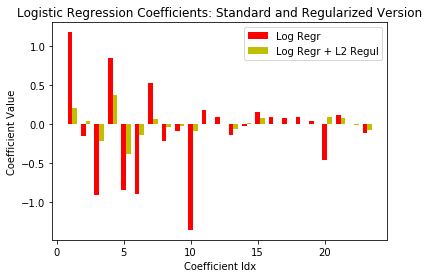

In [12]:
#print the coefficients from logistic regression
print (reg_full.coef_ )

#print the coefficients from L2 regularized logistic regression
print (regL2_full.coef_ )

# note that the intercept is not in coef_, it is in intercept_

print("Intercept: {}".format( regL2_full.intercept_ ))

# Plot the coefficients
regL2_full_coef = regL2_full.coef_.reshape(regL2_full.coef_.shape[1],)
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()

rects1 = ax.bar(ind, reg_coef, width, color='r')
rects2 = ax.bar(ind + width, regL2_full_coef, width, color='y')
ax.legend((rects1[0], rects2[0]), ('Log Regr', 'Log Regr + L2 Regul'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients: Standard and Regularized Version')
plt.show()

### TODO 6: how do the coefficients from L2 regularization compare to the ones from logistic regression? (max 5 lines)

The coefficients are generally much smaller than the ones obtained with logistic regression.

### TODO 7: obtain classification accuracy on training and test data for the L2 regularized model

In [13]:
#now get training and test error and print training and test accuracy

# predictions on training data 
Y_training_prediction_LR_L2 =  regL2_full.predict(X_training)

# predictions on test data 
Y_test_prediction_LR_L2 =  regL2_full.predict(X_test)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on training data
print("Training Accuracy:", 100 * metrics.accuracy_score(Y_training, Y_training_prediction_LR_L2), '%')

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on test data
print("Test Accuracy:", 100 * metrics.accuracy_score(Y_test, Y_test_prediction_LR_L2), '%')

Training Accuracy: 87.14285714285714 %
Test Accuracy: 79.12772585669782 %


### TODO 8: how does accuracy compare to logistic regression? Comment (max 5 lines)

The accurancies are pretty much the same, I guess logistic regression performs a little better since there is a gap of 4% on the training one, even though it is not that relevant.

### TODO 9: use larger datasets for training set

Perform the same estimation procedures using different more points on the training data, that is fix $m_{training} = 500$. You can simply copy and paste all the code above into the cell below.

[1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1
 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1
 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1
 1 0 0 1 0 1 1 1 0 0 0 0 

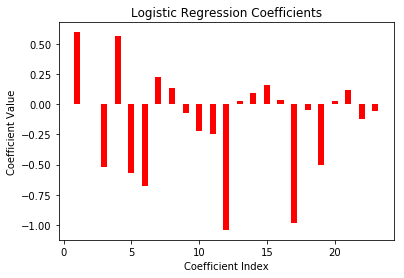

Training Accuracy: 79.80000000000001 %
Test Accuracy: 86.32075471698113 %
Values of parameter C tried in 10-fold Cross-Validation: [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.5820072  0.65601361 0.76822249 0.77230252 0.78030252 0.78030252
 0.77830252 0.77830252 0.77830252 0.77830252]
Best value of parameter C: 0.3593813663804626
10-fold Cross-Validation accuracies obtained with the best value of parameter C: 0.7803025210084034
[[ 5.98360362e-01  1.52230099e-04 -5.24020934e-01  5.71094527e-01
  -5.71094527e-01 -6.76754544e-01  2.29338039e-01  1.35921393e-01
  -7.34329716e-02 -2.23643961e-01 -2.46996857e-01 -1.04254419e+00
   3.10211289e-02  9.09861657e-02  1.60508078e-01  3.72699648e-02
  -9.88628462e-01 -5.07252414e-02 -5.02877873e-01  3.06248604e-02
   1.17943146e-01 -1.24006549e-01 -5.16481102

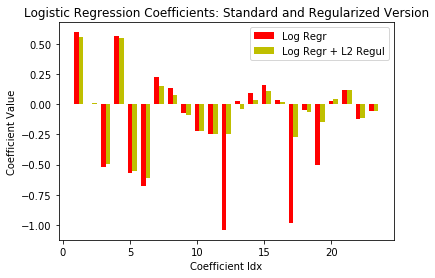

Training Accuracy: 79.2 %
Test Accuracy: 86.32075471698113 %


In [14]:
m_training = 500

m_test = m-m_training

X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size =float(m_test)/float(m), random_state = IDnumber)

print(Y_training)

m_training = X_training.shape[0]
m_test = X_test.shape[0]

#let's see what the fraction of ones in the entire dataset is
print(float(sum(Y_training)+sum(Y_test))/float(m_training+m_test))

# Standardize the Features Matrix
X = X.astype(np.float64) #standard scaler works with double precision data
X_training = X_training.astype(np.float64)
X_test = X_test.astype(np.float64)

#let's use the standard scaling; we degine the scaling for the entire dataset
scaler = preprocessing.StandardScaler().fit(X)

#let's apply the scaling to the training set
X_training = scaler.transform(X_training)

#let's apply the scaling to the test set
X_test = scaler.transform(X_test)


# define a logistic regression model with very high C parameter -> low impact from regularization;
# there are many solvers available to obtain the solution to the logistic regression problem, we just pick
# one of them; 'cv' is the number of folds in cross-validation; we also specify l2 as regularization penalty,
# just to pick one; Cs contains the values of C to be tested and to pick from with validation. Here we
# are interested in only 1 value of C, and use cross-validation just to estimate the validation error
# in a same way as other models
reg = linear_model.LogisticRegressionCV(Cs=[100000000], solver='newton-cg',cv=10, penalty='l2')

#fit the model on training data
reg.fit(X_training, Y_training)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( reg.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds

CV_accuracies = np.divide(np.sum(reg.scores_[1],axis=0),10)

# let's print the average accuracies obtained for the various values of C

print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it

print("Best value of parameter C according to 10-fold Cross-Validation: {}".format( reg.C_[0] ))

# let's store the best CV accuracy, and then print it
reg_best_CV_accuracy = max(CV_accuracies)
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( reg_best_CV_accuracy ))

# let's define the Logistic Regression model
reg_full = linear_model.LogisticRegression(C=100000000, solver='newton-cg', penalty='l2')

# get the best model using the entire training dataset
reg_full.fit(X_training, Y_training)

# print the coefficients from the logistic regression model.
print("Coefficients obtained using the entire training set: {}".format( reg_full.coef_ ))

# note that the intercept is not in coef_, it is in intercept_

print("Intercept: {}".format( reg_full.intercept_ ))

# Plot the coefficients
reg_coef = reg_full.coef_.reshape(reg_full.coef_.shape[1],)
plt.figure()
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
plt.bar(ind, reg_coef, width, color='r')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

# prediction on training data
Y_training_prediction_LR = reg_full.predict(X_training)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
print("Training Accuracy:", 100 * metrics.accuracy_score(Y_training, Y_training_prediction_LR),'%')

# prediction on test data
Y_test_prediction_LR = reg_full.predict(X_test)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
print("Test Accuracy:", 100 * metrics.accuracy_score(Y_test, Y_test_prediction_LR),'%')

#define the model using LogisticRegressionCV passing an appropriate solver, cv value, and choice of penalty
regL2 = linear_model.LogisticRegressionCV(solver = "newton-cg", cv = 10, penalty = "l2")

#fit the model on training data
regL2.fit(X_training, Y_training)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( regL2.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds
CV_accuracies = np.divide(np.sum(regL2.scores_[1],axis=0),10)

# let's print the average accuracies obtained for the various values of C
print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it
print ("Best value of parameter C: {}".format( regL2.C_[0] ))

# let's store the best CV accuracy, and then print it
regL2_best_CV_accuracy = max(CV_accuracies)
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( regL2_best_CV_accuracy ))

#define the model using the best C and an appropriate solver
regL2_full = linear_model.LogisticRegression(C=regL2.C_[0], solver='newton-cg', penalty='l2')

#fit the model using the best C on the entire training set
regL2_full.fit(X_training, Y_training)

#print the coefficients from logistic regression
print (reg_full.coef_ )

#print the coefficients from L2 regularized logistic regression
print (regL2_full.coef_ )

# note that the intercept is not in coef_, it is in intercept_

print("Intercept: {}".format( regL2_full.intercept_ ))

# Plot the coefficients
regL2_full_coef = regL2_full.coef_.reshape(regL2_full.coef_.shape[1],)
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()

rects1 = ax.bar(ind, reg_coef, width, color='r')
rects2 = ax.bar(ind + width, regL2_full_coef, width, color='y')
ax.legend((rects1[0], rects2[0]), ('Log Regr', 'Log Regr + L2 Regul'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients: Standard and Regularized Version')
plt.show()

#now get training and test error and print training and test accuracy
# predictions on training data 
Y_training_prediction_LR_L2 =  regL2_full.predict(X_training)

# predictions on test data 
Y_test_prediction_LR_L2 =  regL2_full.predict(X_test)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on training data
print("Training Accuracy:", 100 * metrics.accuracy_score(Y_training, Y_training_prediction_LR_L2), '%')

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on test data
print("Test Accuracy:", 100 * metrics.accuracy_score(Y_test, Y_test_prediction_LR_L2), '%')

### TODO 10: Discuss all the questions above for the larger set (max 7 lines)
Obviously we still have 23 coefficients since the number of features has not changed.
The accurancy has improved by enlarging the dataset, despite of a little loss on the training, which is actually not important.
Coefficients are still smaller for the regularized version, but the difference among the two is minimal in some cases.